In [ ]:
#@title Function to generate and save cropped images { form-width: "10%" }

def face_crop(df, path_gray, path_rgb, rgb = False):
    df_crop = df
    m = len(df) 
    cascPath = '/content/drive/Shareddrives/Colab Stuff/ML Hackathon/haarcascade_frontalface_alt.xml'
    n = 0

    for i in tqdm(range(m), token='2038705951:AAEliw1QgliicoWVWRuYA5pufhmIGqPPjxE', chat_id='-672484719'):
        try:
            image1 = cv2.imread(df_train['image1'][i])
            image2 = cv2.imread(df_train['image2'][i])

            faceCascade = cv2.CascadeClassifier(cascPath)
            gray1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
            gray2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)

            faces1 = faceCascade.detectMultiScale(gray1, scaleFactor=1.1, minNeighbors=5, minSize=(100, 100))
            faces2 = faceCascade.detectMultiScale(gray2, scaleFactor=1.1, minNeighbors=5, minSize=(100, 100))

            for (x, y, w, h) in faces1:
                image1 = cv2.resize(image1[y:y+h,x:x+w], (224,224))
                gray1 = cv2.resize(gray1[y:y+h,x:x+w], (224,224))

            for (x, y, w, h) in faces2:
                image2 = cv2.resize(image2[y:y+h,x:x+w], (224,224))
                gray2 = cv2.resize(gray2[y:y+h,x:x+w], (224,224))

            cv2.imwrite(path_gray + df_1['image1'][i], gray1)
            cv2.imwrite(path_gray + df_1['image2'][i], gray2)

            cv2.imwrite(path_rgb + df_1['image1'][i], image1)
            cv2.imwrite(path_rgb + df_1['image2'][i], image2)
        except:
            pass

In [ ]:
#face_crop(df_train, img_path_gray, img_path_rgb)

  0%|          | 0/23917 [00:00<?, ?it/s]

In [ ]:
#face_crop(df_test, img_path_gray_test, img_path_rgb_test)

  0%|          | 0/4997 [00:00<?, ?it/s]

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#@title Libraries { form-width: "10%" }

import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import time
import cv2
from collections import Counter

import tqdm.notebook as tq
from tqdm.contrib.telegram import tqdm, trange

In [4]:
token='2038705951:AAEliw1QgliicoWVWRuYA5pufhmIGqPPjxE' 
chat_id='-672484719'

dir_path = '/content/drive/Shareddrives/Colab Stuff/ML Hackathon/'
img_path = dir_path + '/dataset_images'

img_path_gray = '/content/drive/Shareddrives/Colab Stuff/ML Hackathon/images/'
img_path_rgb = '/content/drive/Shareddrives/Colab Stuff/ML Hackathon/images_rgb/'

img_path_gray_test = '/content/drive/Shareddrives/Colab Stuff/ML Hackathon/test_images/'
img_path_rgb_test = '/content/drive/Shareddrives/Colab Stuff/ML Hackathon/test_images_rgb/'

In [5]:
os.chdir(img_path_gray)
list_files = os.listdir()

In [6]:
df_1 = pd.read_csv(dir_path + 'train.csv')
#df_2 = pd.read_csv(dir_path + '/test.csv')
print(df_1.shape)#, df_2.shape)

(23917, 3)


In [7]:
def get_sample(num, type = 'train'):
    if type == 'train': x = df_1.iloc[num]
    #else: x = df_2.iloc[num]
    return x

In [8]:
get_sample(1)

image1    96067473455799.jpg
image2    55378374591770.jpg
label                      0
Name: 1, dtype: object

In [10]:
def path_df(df, path, list):
    failed = np.array([])
    try:    
        p1 = pd.DataFrame([path + j for j in df[df.columns[0]] if j in list], columns = ['image1'])
        p2 = pd.DataFrame([path + j for j in df[df.columns[1]] if j in list], columns = ['image2'])

        temp = pd.concat([p1, p2], axis = 1)
    except:
        pass
    return temp

df_train, df_test = pd.DataFrame([]), pd.DataFrame([])

df_train = pd.concat([path_df(df_1, img_path_gray, list_files), df_1['label']], axis = 1)
df_train = df_train.sample(11250, random_state = 420).reset_index().drop(columns = ['index'])

display(df_train)

,image1,image2,label
0,/content/drive/Shareddrives/Colab Stuff/ML Hac...,/content/drive/Shareddrives/Colab Stuff/ML Hac...,1
1,/content/drive/Shareddrives/Colab Stuff/ML Hac...,/content/drive/Shareddrives/Colab Stuff/ML Hac...,1
2,/content/drive/Shareddrives/Colab Stuff/ML Hac...,/content/drive/Shareddrives/Colab Stuff/ML Hac...,0
3,/content/drive/Shareddrives/Colab Stuff/ML Hac...,/content/drive/Shareddrives/Colab Stuff/ML Hac...,0
4,/content/drive/Shareddrives/Colab Stuff/ML Hac...,/content/drive/Shareddrives/Colab Stuff/ML Hac...,0
...,...,...,...
11245,/content/drive/Shareddrives/Colab Stuff/ML Hac...,/content/drive/Shareddrives/Colab Stuff/ML Hac...,1
11246,/content/drive/Shareddrives/Colab Stuff/ML Hac...,/content/drive/Shareddrives/Colab Stuff/ML Hac...,0
11247,/content/drive/Shareddrives/Colab Stuff/ML Hac...,/content/drive/Shareddrives/Colab Stuff/ML Hac...,0
11248,/content/drive/Shareddrives/Colab Stuff/ML Hac...,/content/drive/Shareddrives/Colab Stuff/ML Hac...,0


In [12]:
def path_to_image(df):
    col = df.columns
    ls1, ls2, ls3 = list(), list(), list()
    temp = pd.DataFrame([],columns = ['image1','image2', 'label'])
    
    for i in tq.tqdm(range(len(df))):
        ls1.append(cv2.imread(df[col[0]][i])[:,:,1]/255.0)
        ls2.append(cv2.imread(df[col[1]][i])[:,:,1]/255.0)
        ls3.append(df[col[2]][i])
    temp['image1'] = np.array(ls1)
    temp['image2'] = np.array(ls2)
    temp['label'] = np.array(ls3)
    return temp

In [14]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical as to
from keras.preprocessing.image import ImageDataGenerator

from keras.layers import Conv2D, MaxPool2D, Flatten, Input, concatenate, Dense, Dropout
from keras.models import Model
from tensorflow.keras.optimizers import Adam, SGD
from keras.callbacks import EarlyStopping
from keras.utils.vis_utils import plot_model
from tqdm.keras import TqdmCallback

In [ ]:
for i in range(len(df_train['label'])):
    if df_train['label'][i] == 0: df_train['label'][i] = "No"
    else: df_train['label'][i] = "Yes"

In [16]:
num = 9000

train_datagen1 = ImageDataGenerator(rescale = 1./255, validation_split = 0.2)

train_generator1 = train_datagen1.flow_from_dataframe(dataframe = df_train, 
                                            x_col = 'image1', 
                                            y_col = 'label', 
                                            shuffle = False, 
                                            subset = 'training',
                                            interpolation = 'nearest',
                                            batch_size = num, 
                                            class_mode = 'categorical', 
                                            color_mode = 'grayscale',
                                            seed = 420,
                                            target_size = (224,224))

val_gen1 = train_datagen1.flow_from_dataframe(dataframe = df_train, 
                                            x_col = 'image1', 
                                            y_col = 'label', 
                                            shuffle = False, 
                                            subset = 'validation',
                                            interpolation = 'nearest',
                                            batch_size = int(0.25*num), 
                                            class_mode = 'categorical', 
                                            color_mode = 'grayscale',
                                            seed = 420,
                                            target_size = (224,224))

train_datagen2 = ImageDataGenerator(rescale = 1./255, validation_split = 0.2)

train_generator2 = train_datagen2.flow_from_dataframe(dataframe = df_train, 
                                            x_col = 'image2', 
                                            y_col = 'label', 
                                            shuffle = False, 
                                            subset = 'training',
                                            interpolation = 'nearest',
                                            batch_size = num, 
                                            class_mode = 'categorical', 
                                            color_mode = 'grayscale',
                                            seed = 420,
                                            target_size = (224,224))

val_gen2 = train_datagen2.flow_from_dataframe(dataframe = df_train, 
                                            x_col = 'image2', 
                                            y_col = 'label', 
                                            shuffle = False, 
                                            subset = 'validation', 
                                            interpolation = 'nearest',
                                            batch_size = int(0.25*num), 
                                            class_mode = 'categorical', 
                                            color_mode = 'grayscale',
                                            seed = 420,
                                            target_size = (224,224))

Found 9000 validated image filenames belonging to 2 classes.
Found 2250 validated image filenames belonging to 2 classes.
Found 9000 validated image filenames belonging to 2 classes.
Found 2250 validated image filenames belonging to 2 classes.


$\textbf{!!***!!}$

train_generator[0][0].shape = (num, 224, 224, 1)   $\checkmark$

train_generator[0][1].shape = (num, 2)     $\checkmark$

In [17]:
train_X1 = train_generator1[0][0] 
train_X2 = train_generator2[0][0]
train_Y = train_generator1[0][1]

val_X1 = val_gen1[0][0]
val_X2 = val_gen2[0][0]
val_Y = val_gen1[0][1]

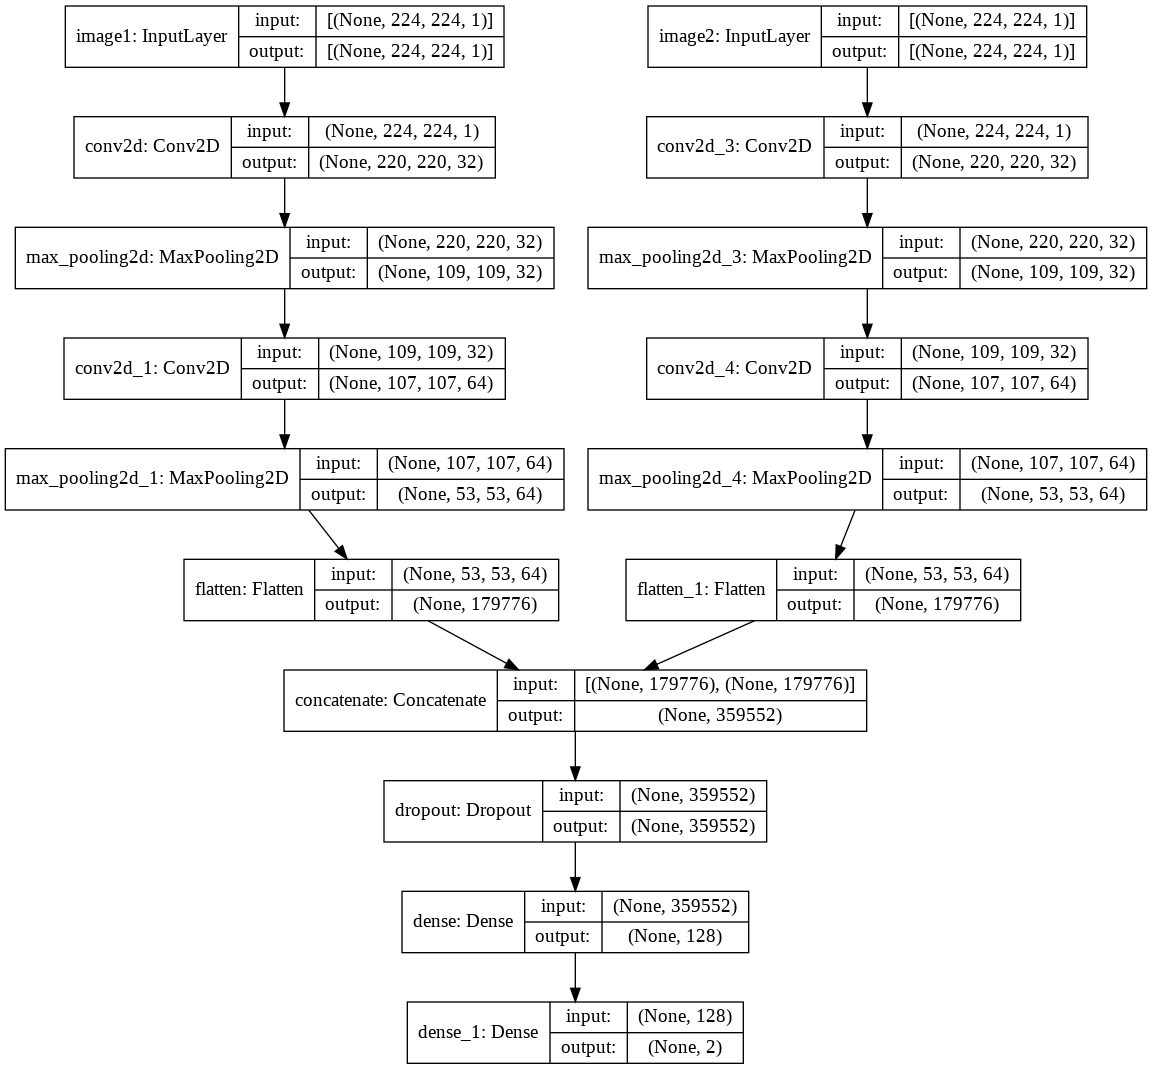

In [18]:
inputs = [Input(shape=(224,224,1), name='image1'), Input(shape=(224,224,1), name='image2')]

flattened_layers = []
for input in inputs:
    conv_layer = Conv2D(32, (5,5), activation = 'relu')(input)
    conv_layer = MaxPool2D((3,3), strides = (2,2))(conv_layer) 
    # note that previous layer is used as input for creating the next layer,
    # you'll need to do this for every layer.
    conv_layer2 = Conv2D(64, (3,3), activation = 'relu')(conv_layer)
    conv_layer2 = MaxPool2D((3,3), strides = (2,2))(conv_layer2)
    
    conv_layer3 = Conv2D(64, (3,3), activation = 'relu')(conv_layer2)
    conv_layer3 = MaxPool2D((3,3), strides = (2,2))(conv_layer3)
    # add more layers here
    flattened_layers.append(Flatten()(conv_layer2)) 

concat = concatenate(flattened_layers, axis=1) #you have to check which axis you want to use here
#add more layers here
dropout = Dropout(0.2)(concat)
output = Dense(128, activation = 'relu')(dropout)
output = Dense(2, activation='softmax')(output)

model = Model(inputs=inputs, outputs=output)
model.compile(optimizer=Adam(learning_rate = 0.01), loss='categorical_crossentropy', metrics=['accuracy'])
plot_model(model, "/content/example_model.png", show_shapes=True)

In [19]:
es_callback = EarlyStopping(monitor = 'val_loss', patience = 10)

history = model.fit([train_X1, train_X2], train_Y, 
                    epochs = 50, 
                    batch_size = 40, 
                    verbose = 0, 
                    validation_data = ([val_X1, val_X2], val_Y),
                    validation_batch_size = 10,
                    callbacks = [es_callback, TqdmCallback(verbose = 0)])

0epoch [00:00, ?epoch/s]

In [ ]:
#Plots
plt.figure(figsize = (10,5))
plt.subplot(121)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Test')
plt.title("Accuracy")
plt.legend()

plt.subplot(122)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Test')
plt.title("Loss")
plt.legend()

plt.show()